FINAL PROJECT

This project analyzes and visualizes astronomical data from the Hubble Ultra Deep Field (HUDF). Using Python libraries such as astropy, sep, and matplotlib, the goal is to perform scientific computations, detect celestial objects, and generate meaningful visualizations. The project consists of two main parts:

1. Following the SEP tutorial to analyze a sample FITS image, including background subtraction, object detection, and flux histogram generation.
2. Applying the same analysis to HUDF images, generating a 3-color composite image representing light captured at different wavelengths.

Part 1: Analyzing the Tutorial FITS Image

This part follows the SEP tutorial to demonstrate background subtraction, object detection, and visualization using a sample FITS image. Here's how it's done:

1. Library Imports and Setup: Essential libraries such as numpy, sep, and astropy are imported to enable scientific data processing and visualization.
2. Load and Visualize Data: A sample FITS image (image.fits) is loaded, and the raw data is displayed with adjusted brightness and contrast.
3. Background Subtraction: The spatially varying background is computed and removed from the image. The background and its RMS noise are visualized as separate images.
4. Object Detection: Using SEP, objects in the background-subtracted image are detected. Ellipses are overlayed on the detected objects to highlight their locations and shapes.
5. Flux Histogram: The flux (brightness) of each detected object is calculated and visualized in a histogram, showing the distribution of source brightness values.

Step 0: Adding the needed Libraries
Importing the libraries needed to execute the code.

In [11]:
import numpy as np
import sep
from astropy.io import fits
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse
from astropy.visualization import make_lupton_rgb

 Step 1: Function to Load FITS Data
Load the FITS file and ensure the data is in native byte order.
This function ensures compatibility with SEP and avoids errors due to byte order mismatch.


In [12]:
def load_fits(file_name):
    data = fits.getdata(file_name)
    if not data.dtype.isnative:
        data = data.byteswap(inplace=True).newbyteorder()
    return data

# Load the tutorial FITS file
fits_file = "image.fits"
data = load_fits(fits_file)

# Ensure the data is in native byte order
assert data.dtype.isnative, "Data is not in native byte order"

FileNotFoundError: [Errno 2] No such file or directory: 'image.fits'

Step 2: Plot and Save the Original Image
Display the raw image data to visualize its initial state.
The brightness and contrast are adjusted using the mean and standard deviation of pixel values.m, s = np.mean(data), np.std(data)

In [13]:
# Step 2: Display and Save the Original Image
print("Displaying and saving the original image...")
m, s = np.mean(data), np.std(data)  # Calculate mean and standard deviation for contrast adjustment
plt.imshow(data, cmap='gray', vmin=m-s, vmax=m+s, origin='lower')  # Same display range as in the notebook
plt.colorbar()
plt.title("Original FITS Image")

# Save the image with enhanced settings
plt.savefig("original_image.png", dpi=300, bbox_inches='tight')  # Save with high DPI and tight layout
plt.show()

Displaying and saving the original image...


NameError: name 'data' is not defined

Step 3: Perform Background Subtraction
Compute the spatially varying background and its RMS (noise).
This step removes unwanted brightness variations caused by the telescope or sky.

In [14]:
# Perform background subtraction
bkg = sep.Background(data)
bkg_image = bkg.back()  # Background model
bkg_rms = bkg.rms()  # RMS noise of the background

# Plot and Save the Background Image
plt.figure(figsize=(10, 8))  # Create a new figure
plt.imshow(bkg_image, interpolation='nearest', cmap='gray', origin='lower')
plt.colorbar()
plt.title("Background Estimation")
plt.tight_layout()  # Prevent clipping
plt.savefig("s1_background_image.png", dpi=300, bbox_inches='tight')  # Save image
plt.show()  # Display in notebook
plt.close()  # Close the figure

# Plot and Save the Background RMS Image
plt.figure(figsize=(10, 8))  # Create a new figure
plt.imshow(bkg_rms, interpolation='nearest', cmap='gray', origin='lower')
plt.colorbar()
plt.title("Background RMS")
plt.tight_layout()  # Prevent clipping
plt.savefig("s1_background_rms_image.png", dpi=300, bbox_inches='tight')  # Save image
plt.show()  # Display in notebook
plt.close()  # Close the figure

NameError: name 'data' is not defined

Step 4: Subtract the Background and Detect Objects
Subtract the computed background model from the raw image to isolate celestial objects.

In [15]:
data_sub = data - bkg

# Detect objects in the background-subtracted image.
# SEP identifies sources based on a detection threshold (1.5 times the global RMS here).
objects = sep.extract(data_sub, 1.5, err=bkg.globalrms)

NameError: name 'data' is not defined

Step 5: Plot Detected Objects
Display the background-subtracted image with red ellipses overlayed on detected objects.

NameError: name 'data_sub' is not defined

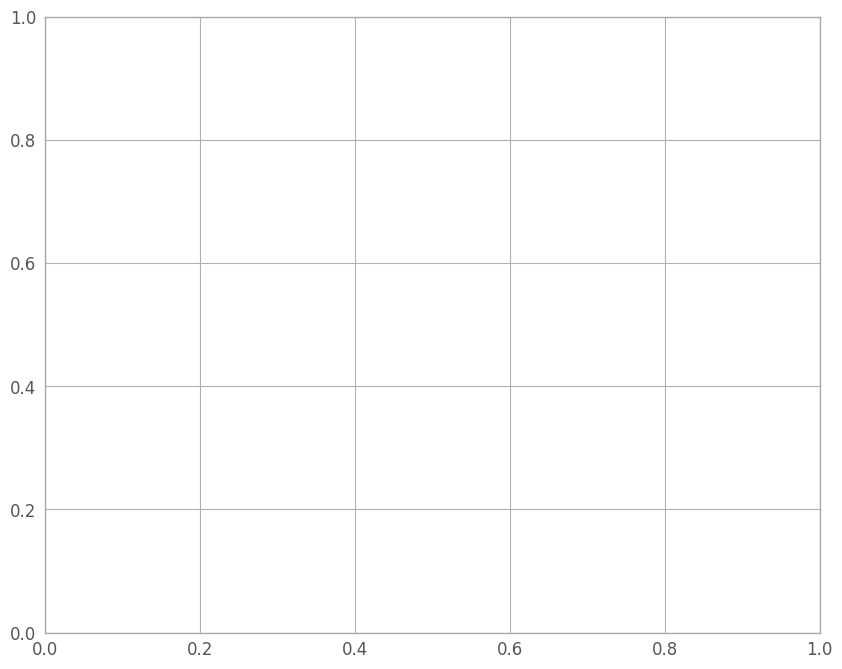

In [16]:
fig, ax = plt.subplots()
m, s = np.mean(data_sub), np.std(data_sub)
im = ax.imshow(data_sub, interpolation='nearest', cmap='gray', vmin=m-s, vmax=m+s, origin='lower')

# Overlay ellipses on the detected objects
for obj in objects:
    e = Ellipse(xy=(obj['x'], obj['y']),
                width=6*obj['a'],
                height=6*obj['b'],
                angle=obj['theta'] * 180. / np.pi)
    e.set_facecolor('none')
    e.set_edgecolor('red')
    ax.add_artist(e)
plt.title("Detected Objects")
plt.show()  # Display the detected objects inline
plt.savefig("detected_objects.png")
plt.close()

Part 2: Analyzing HUDF Images

This part applies the same techniques to real HUDF data to extract deeper insights and create visualizations. Steps include:

1. Loading HUDF FITS Images: The f105w, f125w, and f160w band images are loaded. Each band captures light at different wavelengths, providing a comprehensive view of the data.
2. Background Subtraction and Object Detection: As in Part 1, the background is removed, and objects are detected in the f105w image. The detected objects are visualized with ellipses overlayed.
3. Flux Analysis: A histogram of flux values for detected objects is generated, providing insight into the brightness distribution of celestial sources.
4. Creating a 3-Color Composite Image:
            - The f105w, f125w, and f160w bands are rescaled and normalized to enhance faint sources and 
            map the data to a [0, 1] range for visualization.
            - A composite image is created by assigning red to f160w, green to f125w, and blue to f105w. 
            This RGB composite shows how different wavelengths contribute to the field.
            - The final composite image is displayed, highlighting the structure and colors of the HUDF.


Step 0: Add Libraries
Add the needed libraries for the project

In [17]:
import numpy as np
import sep
from astropy.io import fits
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse

Ensure plots are displayed inline in Jupyter Notebook

In [18]:
%matplotlib inline
plt.rcParams['figure.figsize'] = [10., 8.]  # Set default figure size

Step 1: Load the FITS file
    
Load the f105w band image from a FITS file and ensure the data is in native byte order.
This image will serve as the primary dataset for background subtraction and object detection.

In [19]:
with fits.open("hlsp_hudf12_hst_wfc3ir_udfmain_f105w_v1.0_drz.fits") as hdul:
    f105w_data = hdul[0].data.byteswap().newbyteorder()

FileNotFoundError: [Errno 2] No such file or directory: 'hlsp_hudf12_hst_wfc3ir_udfmain_f105w_v1.0_drz.fits'

Step 2: Display the original image
Display the raw image data to visualize the initial state of the image.
The mean and standard deviation are used to adjust the brightness and contrast.

In [20]:
m, s = np.mean(data), np.std(data)  # Calculate mean and standard deviation for contrast adjustment
plt.imshow(data, cmap='gray', vmin=m-s, vmax=m+s, origin='lower')  # Same display range as in the notebook
plt.colorbar()
plt.title("Original FITS Image")
plt.tight_layout()  # Ensure proper rendering
plt.savefig("original_image.png", dpi=300, bbox_inches='tight')  # Save with high DPI and tight layout
plt.show()

NameError: name 'data' is not defined

Step 3: Background subtraction
Compute the spatially varying background and background RMS (noise) using SEP.
This step removes variations in brightness caused by factors such as the telescope or sky.

In [21]:
# Step 3: Background subtraction
bkg = sep.Background(f105w_data)  # Create a background model
bkg_image = bkg.back()  # Extract the 2D background model
bkg_rms = bkg.rms()  # Extract the RMS noise of the background

# Ensure dimensions match
assert f105w_data.shape == bkg_image.shape, "Dimension mismatch between data and background!"

# Subtract the background model from the original data
data_sub = f105w_data - bkg_image

NameError: name 'f105w_data' is not defined

Step 4: Display the background and noise
Visualize the background model and noise to confirm the subtraction step.

In [22]:
plt.imshow(bkg_image, interpolation='nearest', cmap='gray', origin='lower')
plt.colorbar()
plt.title("Background Estimation")
plt.tight_layout()
plt.savefig("background_image.png", dpi=300, bbox_inches='tight')
plt.show()

plt.imshow(bkg_rms, interpolation='nearest', cmap='gray', origin='lower')
plt.colorbar()
plt.title("Background RMS")
plt.tight_layout()
plt.savefig("background_rms_image.png", dpi=300, bbox_inches='tight')
plt.show()

NameError: name 'bkg_image' is not defined

Step 5: Subtract the background and detect objects
Subtract the background model from the raw data to isolate celestial objects.
Use SEP's `extract` function to identify and characterize these objects.

In [23]:
data_sub = f105w_data - bkg
objects = sep.extract(data_sub, 1.5, err=bkg.globalrms)

NameError: name 'f105w_data' is not defined

Step 6: Display detected objects
Plot the background-subtracted image and overlay ellipses around detected objects.
Each ellipse represents the shape and orientation of a detected source.

NameError: name 'data_sub' is not defined

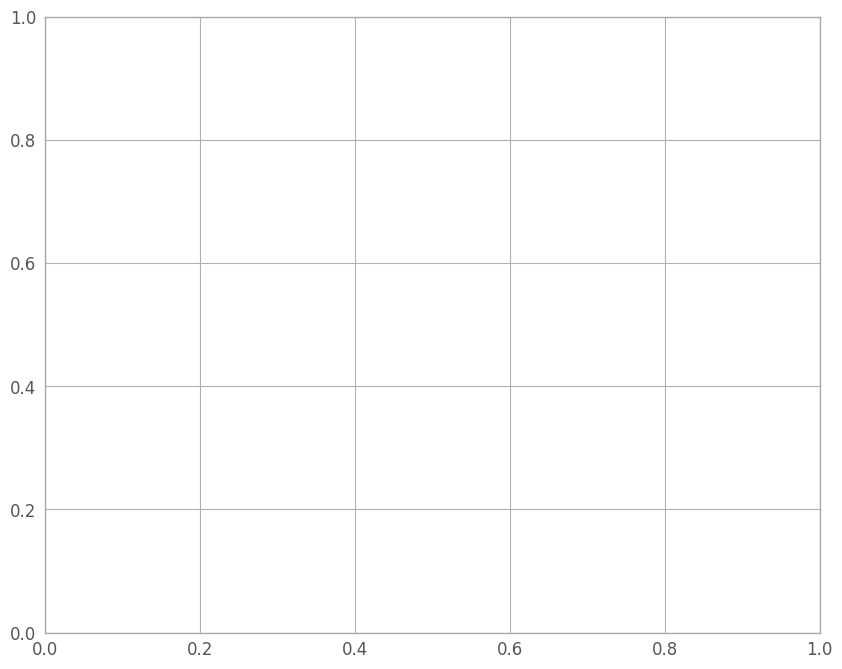

In [24]:
fig, ax = plt.subplots()
m, s = np.mean(data_sub), np.std(data_sub)
im = ax.imshow(data_sub, cmap='gray', vmin=m-s, vmax=m+s, origin='lower')

# Overlay ellipses on detected objects
for obj in objects:
    e = Ellipse(xy=(obj['x'], obj['y']),
                width=6*obj['a'],
                height=6*obj['b'],
                angle=obj['theta'] * 180. / np.pi)
    e.set_facecolor('none')
    e.set_edgecolor('red')
    ax.add_artist(e)

plt.title("Detected Objects")
plt.tight_layout()
plt.savefig("detected_objects.png", dpi=300, bbox_inches='tight')
plt.show()

Step 7: Histogram of fluxes
Measure the flux (brightness) of each detected object using circular aperture photometry.
Generate a histogram of flux values to analyze the distribution of source brightnesses.

In [25]:
flux, fluxerr, flag = sep.sum_circle(data_sub, objects['x'], objects['y'], 3.0, err=bkg.globalrms, gain=1.0)

# Display flux statistics
print(f"Number of objects detected: {len(objects)}")
print(f"Sample flux values: {flux[:10]}")
print(f"Min flux: {np.min(flux)}, Max flux: {np.max(flux)}")

# Remove invalid flux values (e.g., NaN or infinity) before plotting
flux = flux[np.isfinite(flux)]

# Logarithmic scale histogram
plt.hist(flux, bins=50, color='blue', edgecolor='black', alpha=0.7, log=True)
plt.title("Log-Scaled Histogram of Object Fluxes")
plt.xlabel("Flux (Log Scale)")
plt.ylabel("Frequency")
plt.savefig("HistogramOF.png")
plt.show()

NameError: name 'data_sub' is not defined

Step 8: Load additional images for 3-color composite
Load f125w and f160w band images to create a 3-color composite with f105w.
Each band represents light captured at a different wavelength.

In [26]:
with fits.open("hlsp_hudf12_hst_wfc3ir_udfmain_f160w_v1.0_drz.fits") as hdul:
    f160w_data = hdul[0].data.byteswap().newbyteorder()
with fits.open("hlsp_hudf12_hst_wfc3ir_udfmain_f125w_v1.0_drz.fits") as hdul:
    f125w_data = hdul[0].data.byteswap().newbyteorder()

FileNotFoundError: [Errno 2] No such file or directory: 'hlsp_hudf12_hst_wfc3ir_udfmain_f160w_v1.0_drz.fits'

Rescale the data for visualization
Adjust the brightness and contrast of each image to enhance faint sources
and ensure the dynamic range is suitable for visualization.

In [27]:
def rescale_image(data):
    """Rescale image data for better visualization."""
    pdata_tmp = data.copy()
    m = np.nanmean(pdata_tmp)
    vpmin = 0.5 * m
    vpmax = 100 * m
    pdata_tmp[pdata_tmp < vpmin] = vpmin
    pdata_tmp[pdata_tmp > vpmax] = vpmax
    pdata_tmp = np.log10(pdata_tmp)
    return pdata_tmp

# Normalize data to the range [0, 1]
# Map pixel values of the images to the range [0, 1] for proper RGB combination.
def remap(data):
    """Normalize data to the range [0, 1]."""
    data_min = np.min(data)
    data_max = np.max(data)
    return (data - data_min) / (data_max - data_min)

f160w_rescaled = rescale_image(f160w_data)
f125w_rescaled = rescale_image(f125w_data)
f105w_rescaled = rescale_image(f105w_data)

# Combine into RGB format
# Create a false-color RGB image by mapping f160w to red, f125w to green, and f105w to blue.
rgb_image = np.zeros((f160w_data.shape[0], f160w_data.shape[1], 3))
rgb_image[:, :, 0] = remap(f160w_rescaled)  # Red
rgb_image[:, :, 1] = remap(f125w_rescaled)  # Green
rgb_image[:, :, 2] = remap(f105w_rescaled)  # Blue

# Display the remapped 3-color image
# Display the final composite image, where different colors represent contributions
# from different wavelengths of light.
plt.figure(figsize=(20, 20))
plt.axis('off')
plt.imshow(rgb_image)
plt.title("3-Color False Image of HUDF (Normalized)")
plt.savefig("3CFalseImgofHUDF.png")
plt.show()

NameError: name 'f160w_data' is not defined